In [ ]:
"""
https://github.com/rlowd/python-bigdata/blob/master/pandas-exercises/
occupations/occupation-getting-and-knowing-blanks-scrubbed.ipynb

"Getting and Knowing Your Data"
"""

In [1]:
import pandas as pd

In [4]:
users = pd.read_table('occupations-dataset.txt', sep='|', index_col='user_id')
# see the first 25 entries
users.head(25)

C:\Users\lilli\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [5]:
# see the last 10 entries
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


In [7]:
# number of observations in dataset
users.shape[0]

943

In [8]:
# number of columns in dataset
users.shape[1]

4

In [9]:
# the name of the columns
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [10]:
# the indexes (labels) of the dataset
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [13]:
# the datatype of each column
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [23]:
# data structure of the occupation column
type(users['occupation'])

pandas.core.series.Series

In [24]:
# print the occupation column
print(users['occupation'])

user_id
1         technician
2              other
3             writer
4         technician
5              other
6          executive
7      administrator
8      administrator
9            student
10            lawyer
11             other
12             other
13          educator
14         scientist
15          educator
16     entertainment
17        programmer
18             other
19         librarian
20         homemaker
21            writer
22            writer
23            artist
24            artist
25          engineer
26          engineer
27         librarian
28            writer
29        programmer
30           student
           ...      
914            other
915    entertainment
916         engineer
917          student
918        scientist
919            other
920           artist
921          student
922    administrator
923          student
924            other
925         salesman
926    entertainment
927       programmer
928          student
929        scientist
930  

In [29]:
# how many unique occupations are in the dataset?
users.occupation.nunique()

21

In [30]:
# what is the most frequently appearing occupation?
users['occupation'].value_counts().head()

student          196
other            105
educator          95
administrator     79
engineer          67
Name: occupation, dtype: int64

In [31]:
# summarizing the DataFrame
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [32]:
# summarize all columns
users.describe(include='all')

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [33]:
# summarize only the occupation column
users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

In [34]:
# what is the mean age of users?
round(users.age.mean())

34

In [37]:
# what age occurs the least?
users.age.value_counts().tail()

11    1
10    1
73    1
66    1
7     1
Name: age, dtype: int64

In [ ]:
"""
https://github.com/rlowd/python-bigdata/blob/master/
pandas-exercises/titanic/titanic-plotting-blanks-scrubbed.ipynb

Plotting Practice with Titanic Dataset
"""

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [39]:
titanic = pd.read_csv('train.csv')

In [40]:
# view the first 10 entries
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
# set 'PassengerId' as index
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# create a Pie Chart representing the male/female proportion

males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put the above sums into a list
proportions = [males, females]

print(proportions)

[577, 314]


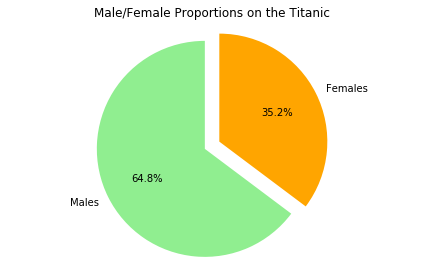

In [45]:
plt.pie(proportions, labels=['Males', 'Females'], shadow=False, colors=['lightgreen', 'orange'],
       explode=(0.15,0), #one side exploded out
       startangle=90, autopct='%1.1f%%' # list the percent as a fraction
       )
# view the plot drop above
plt.axis('equal')

# set labels
plt.title("Male/Female Proportions on the Titanic")

plt.tight_layout()
plt.show()

(-5, 85)

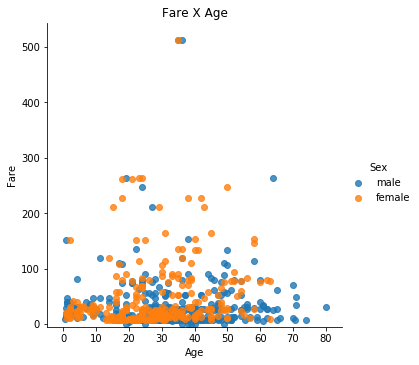

In [46]:
# create a Scatterplot with Fare and Age data, colored by gender
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set the title
lm.set(title = 'Fare X Age')

# get the axes object and treak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

In [48]:
# How many people survived?
titanic.Survived.sum()

342

In [61]:
# create a Histogram from the Fare data

# sort the values from greatest to least and slice the first 5
df = titanic.Fare.sort_values(ascending=False)

# create bins interval using numpy
binsVal = np.linspace(0,600,10)
binsVal

array([  0.        ,  66.66666667, 133.33333333, 200.        ,
       266.66666667, 333.33333333, 400.        , 466.66666667,
       533.33333333, 600.        ])

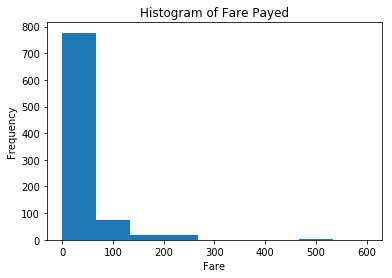

In [64]:
plt.hist(df, bins = binsVal)

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare Payed')

plt.show()